# Hypothesis:

## There is a strong correlation between total government expenditure on education (measured in the percentage of government expenditure) and tertiary school enrollment (measured by the ratio of total enrollment).

In [25]:
import pandas as pd
EDUCATION_SPENDING: str = "SE.XPD.TOTL.GB.ZS"
TERTIARY_SCHOOL_ENROLLMENT: str = "SE.TER.ENRR"

### 0. The CSV file containing the data sourced from the World Bank is read into a DataFrame.

In [26]:
databank = pd.read_csv("../../data/databank_education_2018.csv")

### 1-a. The 'shape' (number of rows, number of columns) of the DataFrame is printed.

In [27]:
databank.shape

(244, 94)

### 1-b. The head method is used to display the first ten rows of the DataFrame.

In [28]:
databank.head(10)

,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


### 2. The 'Country', 'SE.XPD.TOTL.GB.ZS' ("EDUCATION_SPENDING"), and 'SE.TER.ENRR' ("TERTIARY_SCHOOL_ENROLLMENT") columns are isolated and assigned to a new DataFrame.

In [32]:
select_databank = databank[["Country", EDUCATION_SPENDING, TERTIARY_SCHOOL_ENROLLMENT]]
select_databank.head(10)

,Country,SE.XPD.TOTL.GB.ZS,SE.TER.ENRR
0,Afghanistan,NaN,9.686420
1,Albania,NaN,54.961330
2,Algeria,NaN,51.365669
3,Andorra,19.323059,NaN
4,Angola,NaN,NaN
5,Antigua and Barbuda,NaN,NaN
6,Arab World,NaN,32.173851
7,Argentina,NaN,NaN
8,Armenia,NaN,54.570480
9,Aruba,NaN,NaN


### 3. The 'select_databank' DataFrame is filtered to only include the countries with values for both government expenditure on education and tertiary school enrollment columns. The 'shape' and first ten rows of the filtered DataFrame are printed.

In [31]:
filter_databank = select_databank[select_databank[EDUCATION_SPENDING].notna() & select_databank[TERTIARY_SCHOOL_ENROLLMENT].notna()]
print(filter_databank.shape)
filter_databank.head(10)

(46, 3)


,Country,SE.XPD.TOTL.GB.ZS,SE.TER.ENRR
12,Azerbaijan,7.435460,27.708500
19,Belize,21.365290,24.540840
20,Benin,17.709181,12.516990
22,Bhutan,22.766460,15.554510
30,Burkina Faso,22.661169,6.501870
31,Burundi,19.919870,4.057660
33,Cambodia,8.838980,13.687760
34,Cameroon,16.883160,14.267270
42,Colombia,15.982620,55.327492
46,Costa Rica,26.086670,55.207939


### 4-a. The 'filter_databank' is sorted in descending order according to the 'EDUCATION_SPENDING' column. The first ten rows are displayed using the head method.

In [47]:
sort_databank = filter_databank.sort_values(by=EDUCATION_SPENDING, ascending=False)
sort_databank.head(10)

,Country,SE.XPD.TOTL.GB.ZS,SE.TER.ENRR
46,Costa Rica,26.086670,55.207939
91,Honduras,22.954359,26.164221
22,Bhutan,22.766460,15.554510
30,Burkina Faso,22.661169,6.501870
221,Togo,21.769091,14.523930
190,Senegal,21.529409,12.762590
19,Belize,21.365290,24.540840
102,"Iran, Islamic Rep.",21.145679,62.785080
31,Burundi,19.919870,4.057660
136,Madagascar,19.818220,5.350490


### 4-b. The 'filter_databank' is sorted in descending order according to the 'TERTIARY_SCHOOL_SPENDING' column. The first ten rows are displayed using the head method.

In [48]:
sort_databank = filter_databank.sort_values(by=TERTIARY_SCHOOL_ENROLLMENT, ascending=False)
sort_databank.head(10)

,Country,SE.XPD.TOTL.GB.ZS,SE.TER.ENRR
135,"Macao SAR, China",14.667030,90.657097
92,"Hong Kong SAR, China",18.787840,76.922234
191,Serbia,8.804280,67.158661
102,"Iran, Islamic Rep.",21.145679,62.785080
79,Georgia,12.951500,60.334450
42,Colombia,15.982620,55.327492
46,Costa Rica,26.086670,55.207939
111,Kazakhstan,13.880180,53.988251
138,Malaysia,19.738640,45.125389
58,East Asia & Pacific (IDA & IBRD countries),9.594005,44.139858


### 5. Below is a Scatter Plot with 'EDUCATION_SPENDING' serving as the x-axis and 'TERTIARY_SCHOOL_ENROLLMENT' serving as the y-axis.

Text(0, 0.5, 'Tertiary School Enrollment (%)')

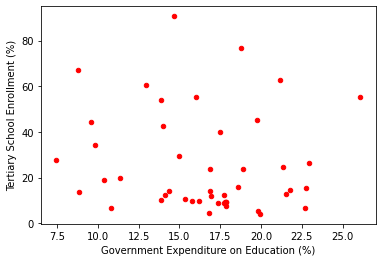

In [55]:
import matplotlib.pyplot as plt

sort_databank.plot.scatter(x=EDUCATION_SPENDING, y=TERTIARY_SCHOOL_ENROLLMENT, alpha=1.0, c='red')
plt.xlabel("Government Expenditure on Education (%)")
plt.ylabel("Tertiary School Enrollment (%)")

### 6. The correlation between 'EDUCATION_SPENDING' and 'TERTIARY_SCHOOL_ENROLLMENT' is calculated and printed.

In [63]:
c1 = filter_databank[EDUCATION_SPENDING]
c2 = filter_databank[TERTIARY_SCHOOL_ENROLLMENT]

c1.corr(c2, method='pearson')

-0.11644261213265486

# Conclusion: